In [1]:
# Remove Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle

# General
import numpy as np
from ta import add_all_ta_features

# Data Management
import pandas as pd
from sklearn.model_selection import train_test_split

# Machine Learning
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Binary Classification Specific Metrics
#from sklearn.metrics import plot_roc_curve

# General Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.graphics.tsaplots as sgt
# Reporting
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from xgboost import plot_tree
from statsmodels.tsa.stattools import acf
from ta.trend import MACD


### Data Management

In [7]:
# Data Extraction
symbol = "LT.NS"
findNumber = True
# Save the trained model to a file
number = [9,17,21,29,48]
df = pd.read_csv("./stock_historical_data/{}.csv".format(symbol))
df.set_index("Date", inplace=True)

df = df[["Open", "High", "Low", "Close","Volume"]]
df["Returns"] = df["Close"].pct_change()
df["Range"] = df["High"] / df["Low"] - 1
df["Avg_Range"] = df["Range"].rolling(window=30).mean()
df.tail()

,Open,High,Low,Close,Volume,Returns,Range,Avg_Range
Date,,,,,,,,
2023-07-04,2458.199951,2484.399902,2458.199951,2461.850098,1441581,0.003178,0.010658,0.013496
2023-07-05,2461.000000,2484.949951,2454.350098,2470.800049,1191896,0.003635,0.012468,0.013386
2023-07-06,2468.100098,2499.949951,2467.550049,2488.600098,1796824,0.007204,0.013130,0.013326
2023-07-07,2482.750000,2504.000000,2444.600098,2449.350098,1837661,-0.015772,0.024298,0.013688
2023-07-10,2450.000000,2463.350098,2420.000000,2438.750000,1178134,-0.004328,0.017913,0.013986


In [8]:
new_model = df["Close"].pct_change()

In [9]:
new_model  = new_model.dropna()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


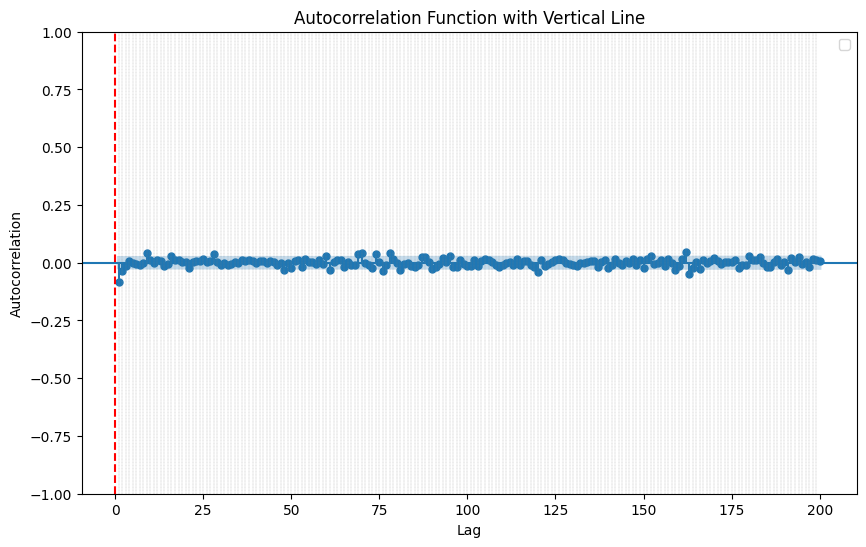

In [12]:
#fig, ax = plt.subplots(figsize=(8, 4))
#sgt.plot_acf(new_model,unbiased =True,zero= False,lags= 50,ax=ax)
#plt.title("ACF for Price :",size =10)
#plt.show()
lag_value = 200
fig, ax = plt.subplots(figsize=(10, 6))
sgt.plot_acf(new_model, ax=ax,lags=lag_value,alpha=0.05,zero = False)

# Add a vertical line at a specific lag value

for num in range(1, lag_value):
    ax.axvline(x=num,linewidth=.2, color='gray', linestyle='--', )

#ax.axvline(x=lag_value, color='red', linestyle='--', label=f'Lag {lag_value}')

# Set labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function with Vertical Line')
ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5)

# Add legend
ax.legend()

# Show the plot
plt.show()

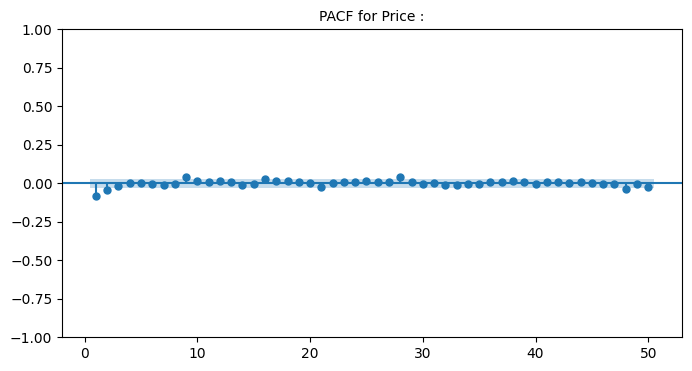

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))

sgt.plot_pacf(new_model,lags=50,alpha=0.05,zero = False,method = ('ols'),ax=ax)
plt.title("PACF for Price :",size =10)
plt.show()

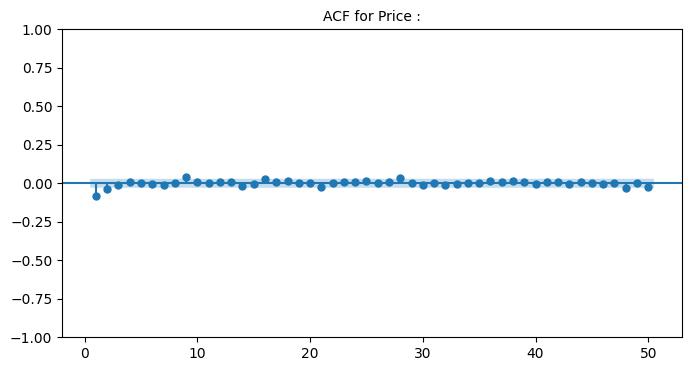

In [29]:

if findNumber == False:
    with open('./TrainedModel/research/{}_indicator.txt'.format(symbol), 'wb') as f:
        pickle.dump(number, f)